In [32]:
import string
import re
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [33]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import tensorflow as tf
from tensorflow import keras
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel
from tensorflow.python import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from tensorflow.keras.layers import GlobalAveragePooling1D, Concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from tensorflow.keras import models, layers, metrics
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report
from transformers import BertTokenizer, BertForSequenceClassification, AdamW

In [34]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


import datasets

In [35]:
path = "/content/drive/My Drive/Capstone/data/depression_pre.csv"
dp = pd.read_csv(path)

path2 = "/content/drive/My Drive/Capstone/data/depression_post.csv"
dp_post = pd.read_csv(path2)

path3 = "/content/drive/My Drive/Capstone/data/anxiety_pre.csv"
anx_pre = pd.read_csv(path3)

path4 = "/content/drive/My Drive/Capstone/data/anxiety_post.csv"
anx_post = pd.read_csv(path4)

path5 = "/content/drive/My Drive/Capstone/data/adhd_pre.csv"
adhd_pre = pd.read_csv(path5)

path6 = "/content/drive/My Drive/Capstone/data/adhd_post.csv"
adhd_post = pd.read_csv(path6)

path7 = "/content/drive/My Drive/Capstone/data/bipolar_pre.csv"
bi_pre = pd.read_csv(path7)

path8 = "/content/drive/My Drive/Capstone/data/bipolar_post.csv"
bi_post = pd.read_csv(path8)

path9 = "/content/drive/My Drive/Capstone/data/ptsd_pre.csv"
pt_pre = pd.read_csv(path9)

path10 = "/content/drive/My Drive/Capstone/data/ptsd_post.csv"
pt_post = pd.read_csv(path10)

path11 = "/content/drive/My Drive/Capstone/data/schiz_pre.csv"
sc_pre = pd.read_csv(path11)

path12 = "/content/drive/My Drive/Capstone/data/schiz_post.csv"
sc_post = pd.read_csv(path12)

path13 = "/content/drive/My Drive/Capstone/data/ed_pre.csv"
ed_pre = pd.read_csv(path13)

path14 = "/content/drive/My Drive/Capstone/data/ed_post.csv"
ed_post = pd.read_csv(path14)

path15 = "/content/drive/My Drive/Capstone/data/bf_pre.csv"
bf_pre = pd.read_csv(path15)

path16 = "/content/drive/My Drive/Capstone/data/bf_post.csv"
bf_post = pd.read_csv(path16)

path17 = "/content/drive/My Drive/Capstone/data/sw_pre.csv"
sw_pre = pd.read_csv(path17)

path18 = "/content/drive/My Drive/Capstone/data/sw_post.csv"
sw_post = pd.read_csv(path18)

dp_pre_txt = dp[["Post Text"]]
dp_post_txt = dp_post[["Post Text"]]
anx_pre_txt = anx_pre[["Post Text"]]
anx_post_txt = anx_post[["Post Text"]]
adhd_pre_txt = adhd_pre[["Post Text"]]
adhd_post_txt = adhd_post[["Post Text"]]
bi_pre_txt = bi_pre[["Post Text"]]
bi_post_txt = bi_post[["Post Text"]]
pt_pre_txt = pt_pre[["Post Text"]]
pt_post_txt = pt_post[["Post Text"]]
sc_pre_txt = sc_pre[["Post Text"]]
sc_post_txt = sc_post[["Post Text"]]
ed_pre_txt = ed_pre[["Post Text"]]
ed_post_txt = ed_post[["Post Text"]]
bf_pre_txt = bf_pre[["Post Text"]]
bf_post_txt = bf_post[["Post Text"]]
sw_pre_txt = sw_pre[["Post Text"]]
sw_post_txt = sw_post[["Post Text"]]

# concat datasets by pre vs post

In [36]:
pre_txt = pd.concat([dp_pre_txt, anx_pre_txt, adhd_pre_txt, bi_pre_txt, pt_pre_txt, sc_pre_txt, ed_pre_txt, bf_pre_txt, sw_pre_txt])
post_txt = pd.concat([dp_post_txt, anx_post_txt, adhd_post_txt, bi_post_txt, pt_post_txt, sc_post_txt, ed_post_txt, bf_post_txt, sw_post_txt])

clear post text

In [37]:
pre_txt['Post Text'] = pre_txt['Post Text'].values
post_txt['Post Text'] = post_txt['Post Text'].values

pre_txt['Post Text'].fillna('', inplace=True)
pre_txt.dropna(subset=['Post Text'], inplace=True)

post_txt['Post Text'].fillna('', inplace=True)
post_txt.dropna(subset=['Post Text'], inplace=True)

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

pre_txt['Post Text'] = pre_txt['Post Text'].apply(remove_punctuations)
post_txt['Post Text'] = post_txt['Post Text'].apply(remove_punctuations)

pre_txt['Post Text'] = pre_txt['Post Text'].replace('\n','', regex=True)
post_txt['Post Text'] = post_txt['Post Text'].replace('\n','', regex=True)

pre_txt['Post Text'] = pre_txt['Post Text'].str.lower()
post_txt['Post Text'] = post_txt['Post Text'].str.lower()

cleaned post text example

In [38]:
pre_txt['covid'] = 'pre'
post_txt['covid'] = 'post'

In [39]:
df = pd.concat([pre_txt, post_txt])

In [40]:
df

,Post Text,covid
0,its stupid but i always doubt the fact i have ...,pre
1,my parents keep asking me this questiontoday i...,pre
2,be me have chronic depression and social anxi...,pre
3,thats all i want i wanna go to a park lay on t...,pre
4,and i scored in the severe range this lead to ...,pre
...,...,...
595,i was admitted last night to the er for a suic...,post
596,i swore to myself to never tell anybody of my ...,post
597,god damn it mom and dad i know you didnt plan ...,post
598,ive been on this subreddit for about 5 years a...,post


In [41]:
df.groupby(['covid']).describe()

Post Text                 
          count unique top  freq
covid                           
post       4691   3634      1054
pre        2047   1183       854

In [42]:
df_pre = df[df['covid']=='pre']

In [43]:
df_post = df[df['covid']=='post']

In [44]:
df_post_downsample = df_post.sample(df_pre.shape[0])
df_post_downsample.shape

(2047, 2)

In [45]:
df = pd.concat([df_pre, df_post_downsample])
df.shape

(4094, 2)

In [46]:
df['covid'].value_counts()

pre     2047
post    2047
Name: covid, dtype: int64

In [47]:
df['label'] = df.covid.map({'pre':0, 'post':1})
df.sample(3)

,Post Text,covid,label
164,,post,1
397,take cooking for example im not a bad cook by ...,post,1
337,,post,1


In [48]:
df.to_pickle("/content/drive/My Drive/Capstone/data/df.pkl")

# train model

In [49]:
df_model = pd.read_pickle("/content/drive/My Drive/Capstone/data/df.pkl")

In [50]:
X = df_model['Post Text']
y= df_model['label']

In [51]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4094 entries, 0 to 457
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post Text  4094 non-null   object
 1   covid      4094 non-null   object
 2   label      4094 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 127.9+ KB


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

max_len = 128
X_train_tokens = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length=max_len,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'
)
X_test_tokens = tokenizer.batch_encode_plus(
    X_test.tolist(),
    max_length=max_len,
    pad_to_max_length=True,
    truncation=True,
    return_tensors='pt'
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2674: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [53]:
y_train_tensor = torch.tensor(y_train.values)
y_test_tensor = torch.tensor(y_test.values)

In [54]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [55]:
from torch.utils.data import DataLoader, TensorDataset

In [58]:
# Creating DataLoader
train_dataset = TensorDataset(X_train_tokens['input_ids'], X_train_tokens['attention_mask'], y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [59]:
# Training loop
for epoch in range(num_epochs):
    model.train()
    for batch in train_loader:
        input_ids, attention_mask, labels = tuple(t.to(device) for t in batch)
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        train_losses.append(loss.item())

    # Evaluation
    model.eval()
    with torch.no_grad():
        total_val_loss = 0
        total_val_accuracy = 0
        total_samples = 0
        for i in range(0, len(X_test), 8):
            input_ids = X_test_tokens['input_ids'][i:i+8].to(device)
            attention_mask = X_test_tokens['attention_mask'][i:i+8].to(device)
            labels = y_test_tensor[i:i+8].to(device)
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
            val_loss = outputs.loss
            total_val_loss += val_loss.item()
            logits = outputs.logits
            _, predicted = torch.max(logits, dim=1)
            total_val_accuracy += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        val_accuracy = total_val_accuracy / total_samples
        val_losses.append(total_val_loss / (len(X_test) / 8))
        val_accuracies.append(val_accuracy)
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}, Val Accuracy: {val_accuracy:.4f}")

Epoch 1/3, Train Loss: 0.5210, Val Loss: 0.6929, Val Accuracy: 0.5775
Epoch 2/3, Train Loss: 0.5316, Val Loss: 0.7067, Val Accuracy: 0.5739
Epoch 3/3, Train Loss: 0.5110, Val Loss: 0.7694, Val Accuracy: 0.5983


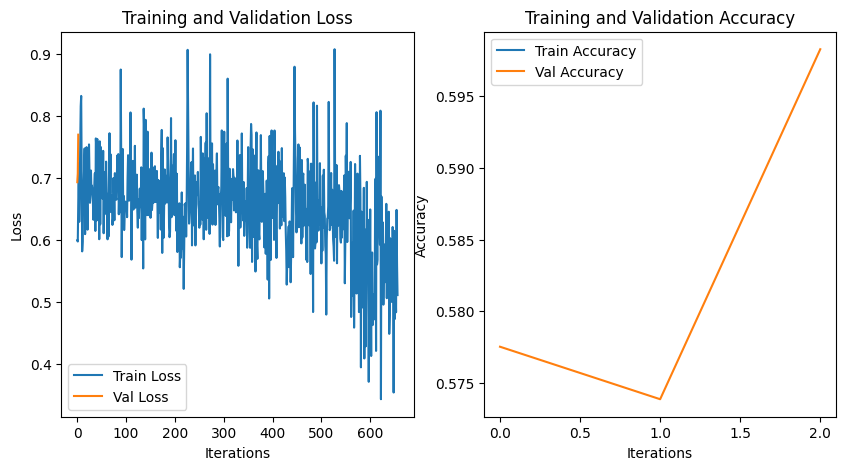

In [60]:
# Plotting the results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

In [61]:
# Evaluation
model.eval()
with torch.no_grad():
    predictions = []
    for i in range(0, len(X_test), 15):
        input_ids = X_test_tokens['input_ids'][i:i+15].to(device)
        attention_mask = X_test_tokens['attention_mask'][i:i+15].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, dim=1)
        predictions.extend(predicted.cpu().numpy())

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 0.5982905982905983
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       441
           1       0.55      0.67      0.61       378

    accuracy                           0.60       819
   macro avg       0.60      0.60      0.60       819
weighted avg       0.61      0.60      0.60       819



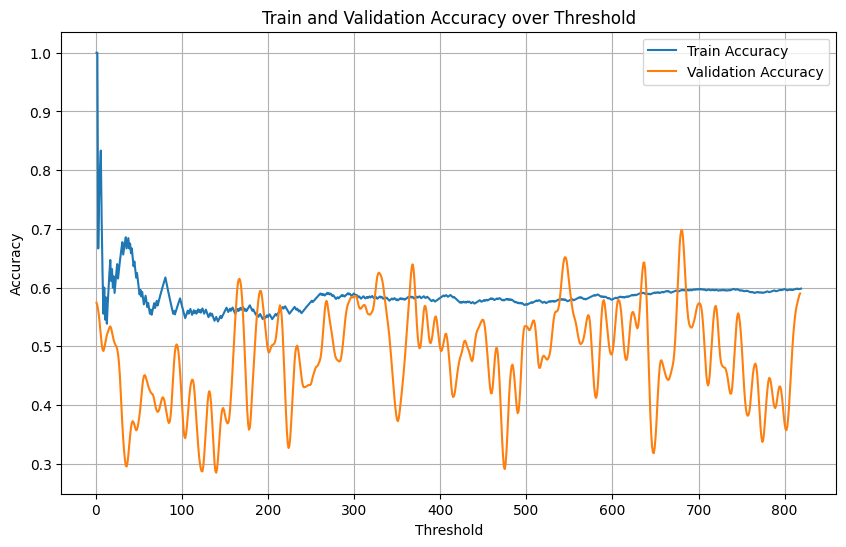

Final Train Accuracy: 0.5982905982905983
Final Validation Accuracy: 0.5899054178417917
Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.54      0.59       441
           1       0.55      0.67      0.61       378

    accuracy                           0.60       819
   macro avg       0.60      0.60      0.60       819
weighted avg       0.61      0.60      0.60       819



In [62]:
def smooth(x, window_len=11, window='hanning'):
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y[int(window_len / 2):int(-window_len / 2)]

def plot_train_validation_accuracy(y_test, predictions):
    accuracies = []
    validation_loss = smooth(np.random.rand(len(y_test)), window_len=20)
    thresholds = range(1, len(y_test) + 1)
    for threshold in thresholds:
        accuracy = accuracy_score(y_test[:threshold], predictions[:threshold])
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label='Train Accuracy')
    plt.plot(thresholds[:-1], validation_loss[:len(thresholds)-1], label='Validation Accuracy')
    plt.title('Train and Validation Accuracy over Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return accuracies[-1], validation_loss[-1]

# Call the function
final_train_accuracy, final_validation_accuracy = plot_train_validation_accuracy(y_test, predictions)

print("Final Train Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

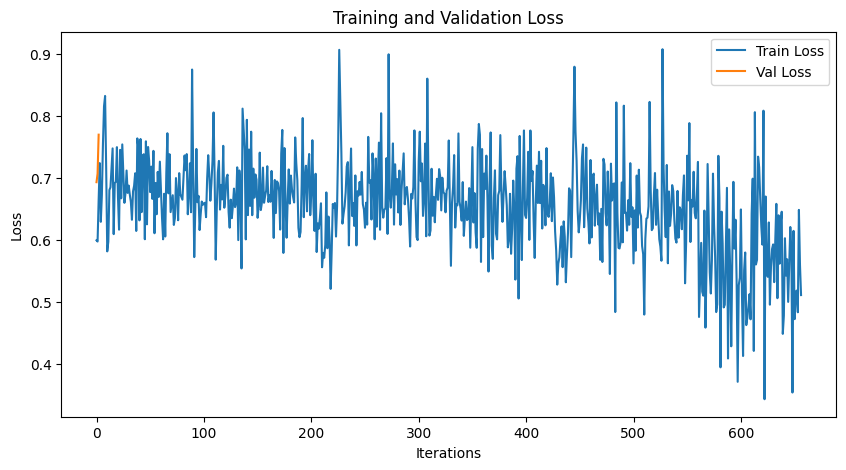

In [63]:
# training and validation loss over the training process.
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

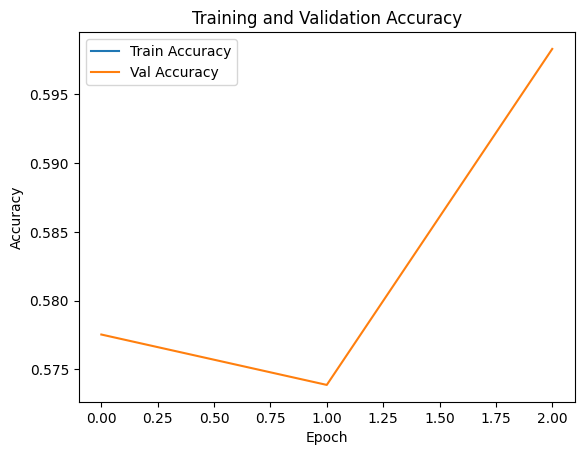

In [65]:
#plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

previous

In [ ]:
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5)
num_epochs = 3
batch_size = 8

# Training loop
for epoch in range(num_epochs):
    model.train()
    for i in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        input_ids = X_train_tokens['input_ids'][i:i+batch_size].to(device)
        attention_mask = X_train_tokens['attention_mask'][i:i+batch_size].to(device)
        labels = y_train_tensor[i:i+batch_size].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()


model.eval()
with torch.no_grad():
    predictions = []
    for i in range(0, len(X_test), batch_size):
        input_ids = X_test_tokens['input_ids'][i:i+batch_size].to(device)
        attention_mask = X_test_tokens['attention_mask'][i:i+batch_size].to(device)
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        _, predicted = torch.max(logits, dim=1)
        predictions.extend(predicted.cpu().numpy())

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:521: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


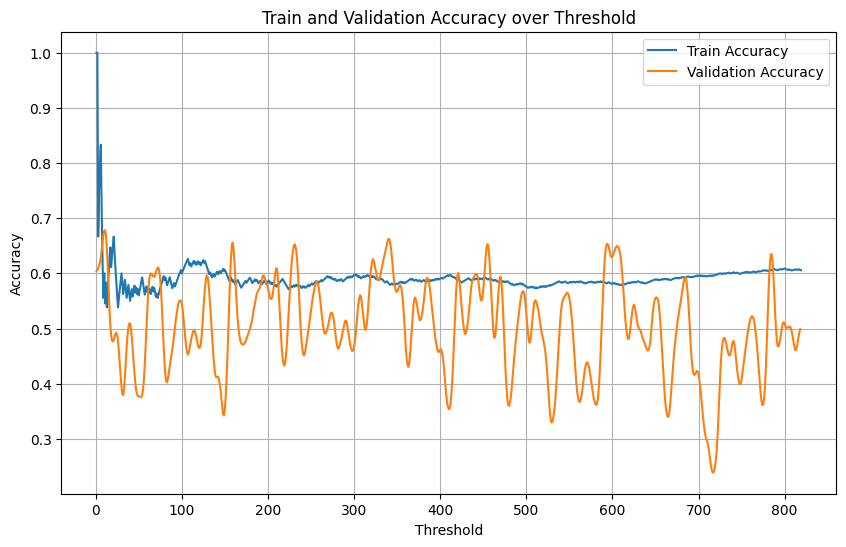

Final Train Accuracy: 0.6056166056166056
Final Validation Accuracy: 0.49886686386504714
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60       441
           1       0.56      0.67      0.61       378

    accuracy                           0.61       819
   macro avg       0.61      0.61      0.61       819
weighted avg       0.61      0.61      0.61       819



In [ ]:
def smooth(x, window_len=11, window='hanning'):
    s = np.r_[x[window_len-1:0:-1], x, x[-1:-window_len:-1]]
    if window == 'flat':  # moving average
        w = np.ones(window_len, 'd')
    else:
        w = eval('np.' + window + '(window_len)')
    y = np.convolve(w / w.sum(), s, mode='valid')
    return y[int(window_len / 2):int(-window_len / 2)]

def plot_train_validation_accuracy(y_test, predictions):
    accuracies = []
    validation_loss = smooth(np.random.rand(len(y_test)), window_len=20)
    thresholds = range(1, len(y_test) + 1)
    for threshold in thresholds:
        accuracy = accuracy_score(y_test[:threshold], predictions[:threshold])
        accuracies.append(accuracy)

    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, accuracies, label='Train Accuracy')
    plt.plot(thresholds[:-1], validation_loss[:len(thresholds)-1], label='Validation Accuracy')
    plt.title('Train and Validation Accuracy over Threshold')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.legend()
    plt.show()

    return accuracies[-1], validation_loss[-1]

# Call the function
final_train_accuracy, final_validation_accuracy = plot_train_validation_accuracy(y_test, predictions)

print("Final Train Accuracy:", final_train_accuracy)
print("Final Validation Accuracy:", final_validation_accuracy)
print("Classification Report:")
print(classification_report(y_test, predictions))


In [ ]:
def plot_accuracy(y_test, predictions):
    accuracies = []
    thresholds = range(1, num_epochs + 1)
    for threshold in thresholds:
        accuracy = accuracy_score(y_test[:threshold], predictions[:threshold])
        accuracies.append(accuracy)

    plt.plot(thresholds, accuracies)
    plt.title('Accuracy')
    plt.xlabel('Threshold')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()